In [1]:
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from validation.gp.create_train_inference import create_train_inference_gp
from lib.util import helper, data_preprocessing
import torch
import gpytorch

## 15 minutes

In [17]:
X_train, y_train, X_test, y_test, n_train = data_preprocessing.gp_preprocess(
    'uv_sigma_line_eg_15T', 15, normalize_time=True, custom_dates=False)

In [18]:
period_constraint_short1 = gpytorch.constraints.Interval(0.01145, 0.01146)
per1 = gpytorch.kernels.PeriodicKernel(period_length_constraint=period_constraint_short1)
period_constraint_short2 = gpytorch.constraints.Interval(0.01354, 0.01355)
per2 = gpytorch.kernels.PeriodicKernel(period_length_constraint=period_constraint_short2)
period_constraint_short3 = gpytorch.constraints.Interval(0.01562, 0.01563)
per3 = gpytorch.kernels.PeriodicKernel(period_length_constraint=period_constraint_short3)

variation = gpytorch.kernels.ScaleKernel(gpytorch.kernels.RBFKernel())

covar_module = gpytorch.kernels.ScaleKernel(per1 + per2 + per3) + variation

Iter 1 , Loss = 1.4231533163992025 , Noise = 0.6932471990585327
Iter 2 , Loss = 1.421889027455351 , Noise = 0.698259711265564
Iter 3 , Loss = 1.4206630003478675 , Noise = 0.7032915353775024
Iter 4 , Loss = 1.4194754341708562 , Noise = 0.7083386182785034
Iter 5 , Loss = 1.4183263747359913 , Noise = 0.7133966684341431
Iter 6 , Loss = 1.4172158423271224 , Noise = 0.718461275100708
Iter 7 , Loss = 1.4161437817953204 , Noise = 0.7235276699066162
Iter 8 , Loss = 1.4151101418786778 , Noise = 0.7285910844802856
Iter 9 , Loss = 1.4141144212614467 , Noise = 0.7336466312408447
Iter 10 , Loss = 1.4131564569952613 , Noise = 0.7386889457702637
Iter 11 , Loss = 1.412235757282171 , Noise = 0.7437129616737366
Iter 12 , Loss = 1.4113518863033168 , Noise = 0.7487131357192993
Iter 13 , Loss = 1.4105043181775727 , Noise = 0.7536841034889221
Iter 14 , Loss = 1.4096922186452925 , Noise = 0.7586202025413513
Iter 15 , Loss = 1.4089149245583956 , Noise = 0.7635160088539124
Iter 16 , Loss = 1.4081716462013953 , 

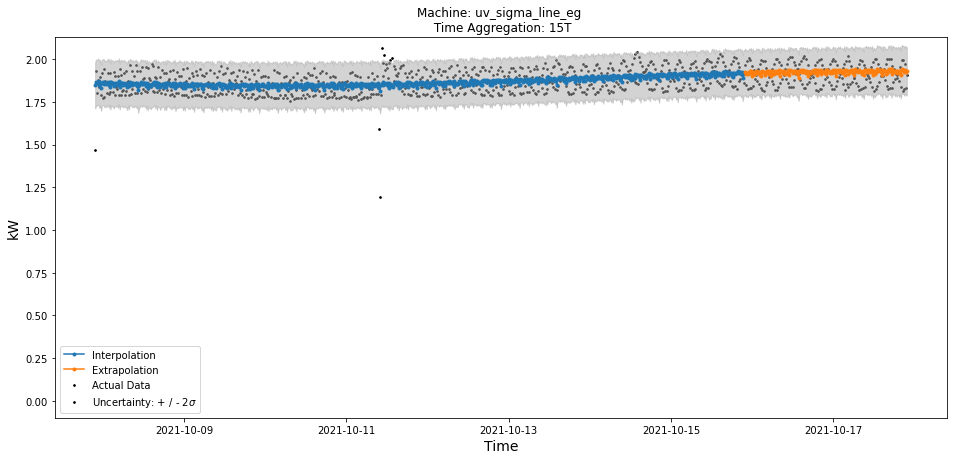

Abnormal High Energy Consumption
---------------------------------
2021-10-11T10:30:00.000000000 2.0660362312197837
2021-10-11T11:15:00.000000000 2.0217764279957846
2021-10-11T13:00:00.000000000 1.996927750906214
2021-10-11T13:30:00.000000000 2.0068204396108356


Abnormal Low Energy Consumption
---------------------------------
2021-10-07T21:45:00.000000000 1.465684955307262
2021-10-11T09:45:00.000000000 1.5901446904894707
2021-10-11T10:00:00.000000000 1.1931376236059537


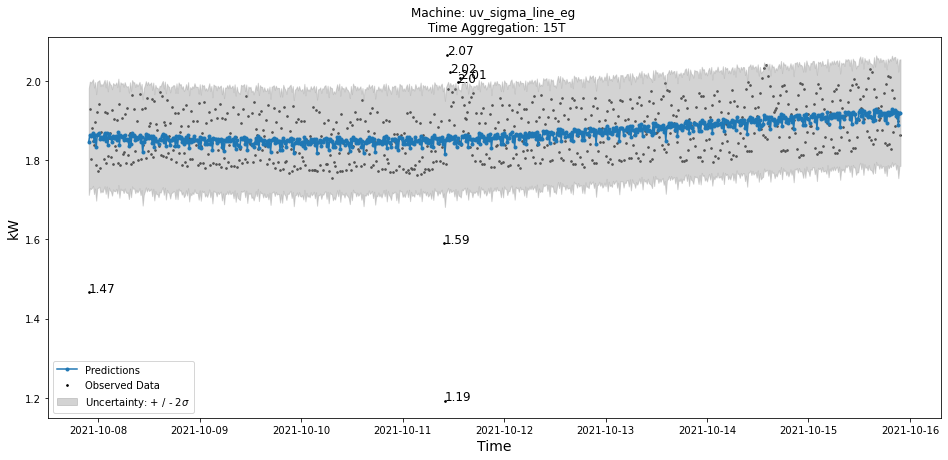

/Users/wastechs/Documents/git-repos/energy-efficiency/validation/gp/create_train_inference.py:407: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.scatter(orig_time[upper], deviation[upper], color='red')
/Users/wastechs/Documents/git-repos/energy-efficiency/validation/gp/create_train_inference.py:408: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.scatter(orig_time[lower], deviation[lower], color='red')


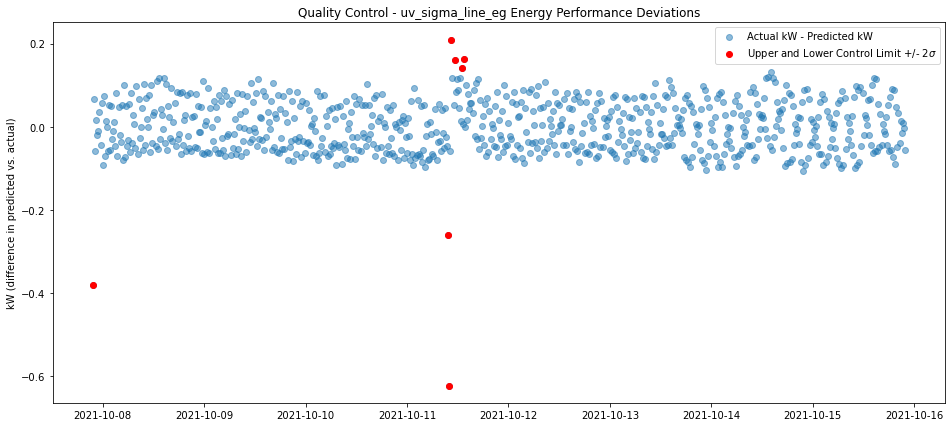

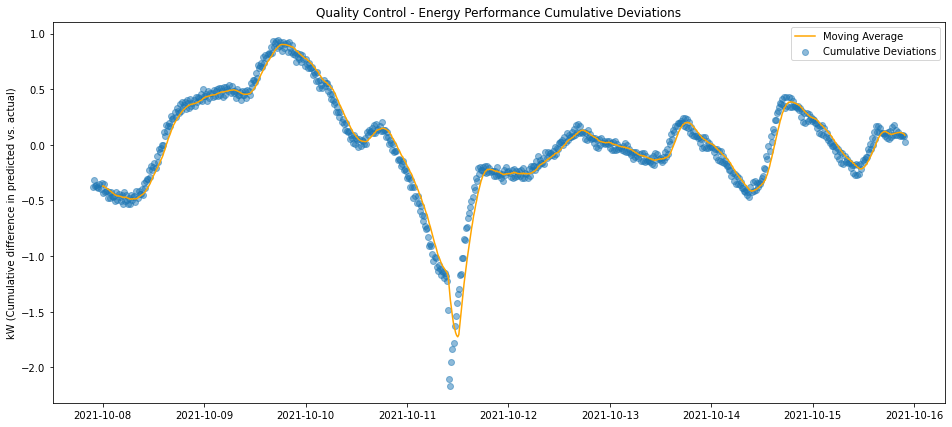

1.0 0.02776305402696172


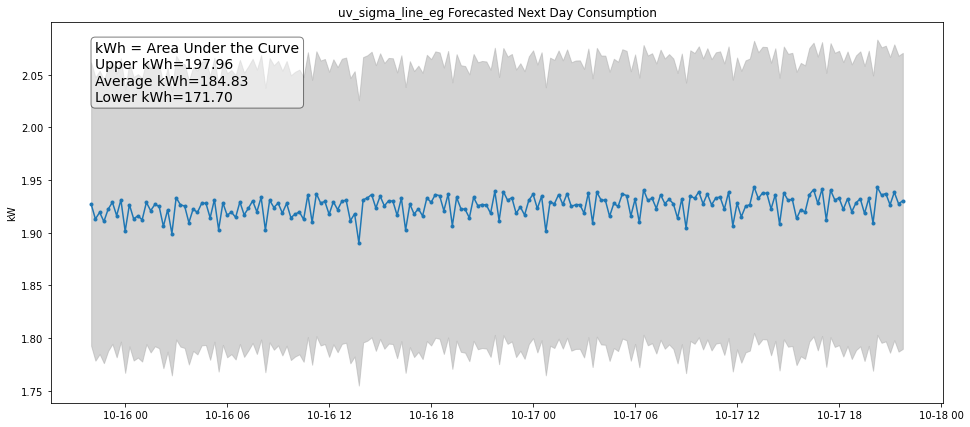

In [19]:
func_preds_mean_inv, func_preds_var_inv, observed_preds, mse, mape = create_train_inference_gp(
    kernel_gen=covar_module,
    train_x=X_train,
    train_y=y_train,
    test_x=X_test,
    test_y=y_test,
    n_train=n_train,
    lr=0.01,
    training_iter=75,
    time_agg='15T',
    machine='uv_sigma_line_eg',
    update_score=False
)   

In [16]:
mse, mape

(0.003820916356041031, 0.028274403667182646)